In this notebook, we collect stock price data from yahoo finance, a media property that is part of Yahoo!'s network. <br> 
We utilize the yfinance api https://pypi.org/project/yahoo-finance/ by Ran Aroussi. <br>
Credits: Rohan Joseph https://towardsdatascience.com/downloading-historical-stock-prices-in-python-93f85f059c1f

In [1]:
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io

In [2]:
# Time period for stock data
from datetime import date
start = datetime.datetime(2016,1,1)
end = date.today()

In [3]:
# Get stock ticker symbols listed on NASDAQ
url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"
s = requests.get(url).content
companies = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [4]:
Symbols = companies['Symbol'].tolist()

In [5]:
# create empty dataframe
stock_final = pd.DataFrame()
# iterate over each symbol
for i in Symbols:  
    
    # print the symbol which is being downloaded
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None

0 : AAIT,1 : AAL,2 : AAME,3 : AAOI,4 : AAON,5 : AAPL,6 : AAVL,7 : AAWW,8 : AAXJ,9 : ABAC,
1 Failed download:
- ABAC: No data found for this date range, symbol may be delisted
10 : ABAX,11 : ABCB,12 : ABCD,13 : ABCO,14 : ABCW,
1 Failed download:
- ABCW: No data found for this date range, symbol may be delisted
15 : ABDC,
1 Failed download:
- ABDC: No data found, symbol may be delisted
16 : ABGB,
1 Failed download:
- ABGB: No data found for this date range, symbol may be delisted
17 : ABIO,18 : ABMD,19 : ABTL,
1 Failed download:
- ABTL: No data found for this date range, symbol may be delisted
20 : ABY,
1 Failed download:
- ABY: No data found for this date range, symbol may be delisted
21 : ACAD,22 : ACAS,
1 Failed download:
- ACAS: No data found for this date range, symbol may be delisted
23 : ACAT,
1 Failed download:
- ACAT: No data found for this date range, symbol may be delisted
24 : ACET,25 : ACFC,26 : ACFN,27 : ACGL,28 : ACHC,29 : ACHN,
1 Failed download:
- ACHN: No data found, sy

In [6]:
stock_final

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2016-01-04,0.129814,0.129814,0.128314,0.129064,0.129064,2366619.0,AAIT
2016-01-05,0.128314,0.129064,0.127563,0.128314,0.128314,721332.0,AAIT
2016-01-06,0.127563,0.127563,0.126813,0.127563,0.127563,424647.0,AAIT
2016-01-07,0.126063,0.126063,0.119309,0.120810,0.120810,8543284.0,AAIT
2016-01-11,0.123061,0.123811,0.120060,0.120810,0.120810,1715576.0,AAIT
...,...,...,...,...,...,...,...
2021-02-16,47.360001,47.450001,46.200001,46.490002,46.490002,140700.0,ZUMZ
2021-02-17,46.110001,46.220001,44.939999,45.750000,45.750000,164400.0,ZUMZ
2021-02-18,45.610001,45.750000,44.400002,45.240002,45.240002,152700.0,ZUMZ


In [7]:
stock_final.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2.360847e+06,2.360847e+06,2.360847e+06,2.360847e+06,2.360847e+06,2.360847e+06
mean,3.311594e+04,3.564331e+04,3.084429e+04,3.258262e+04,3.258156e+04,9.390979e+05
std,3.001605e+06,3.255819e+06,2.773978e+06,2.939256e+06,2.939256e+06,5.881355e+06
min,1.000000e-05,1.000000e-05,1.000000e-05,1.000000e-05,1.000000e-05,0.000000e+00
25%,7.850000e+00,8.000000e+00,7.660000e+00,7.840000e+00,7.530000e+00,1.790000e+04
50%,2.080000e+01,2.114000e+01,2.046000e+01,2.080000e+01,1.981000e+01,1.146000e+05
75%,4.445000e+01,4.505000e+01,4.381000e+01,4.445000e+01,4.276831e+01,4.815000e+05
max,6.930000e+08,7.560000e+08,5.544000e+08,5.949000e+08,5.949000e+08,9.911062e+08


In [8]:
#check missing data
stock_final.isna().sum()

Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
Name         0
dtype: int64

In [9]:
# number of companies with stock data
stock_final['Name'].nunique()

1936

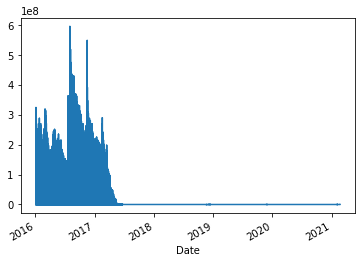

In [10]:
import matplotlib.pyplot as plt
stock_final['Close'].plot()
plt.show()

In [11]:
# get Alphabet stock from all the companies' data
Alphabet_stock = stock_final[stock_final['Name'] == 'GOOGL']
Alphabet_stock

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2016-01-04,762.200012,762.200012,747.539978,759.440002,759.440002,3369100.0,GOOGL
2016-01-05,764.099976,769.200012,755.650024,761.530029,761.530029,2260800.0,GOOGL
2016-01-06,750.369995,765.729980,748.000000,759.330017,759.330017,2410300.0,GOOGL
2016-01-07,746.489990,755.309998,735.280029,741.000000,741.000000,3156600.0,GOOGL
2016-01-08,747.799988,750.119995,728.919983,730.909973,730.909973,2375300.0,GOOGL
...,...,...,...,...,...,...,...
2021-02-16,2091.750000,2145.139893,2091.750000,2110.699951,2110.699951,1548900.0,GOOGL
2021-02-17,2093.979980,2122.439941,2088.350098,2118.620117,2118.620117,1014700.0,GOOGL
2021-02-18,2105.000000,2121.989990,2093.330078,2105.810059,2105.810059,1127300.0,GOOGL


Text(0, 0.5, 'Close prices for GOOGL')

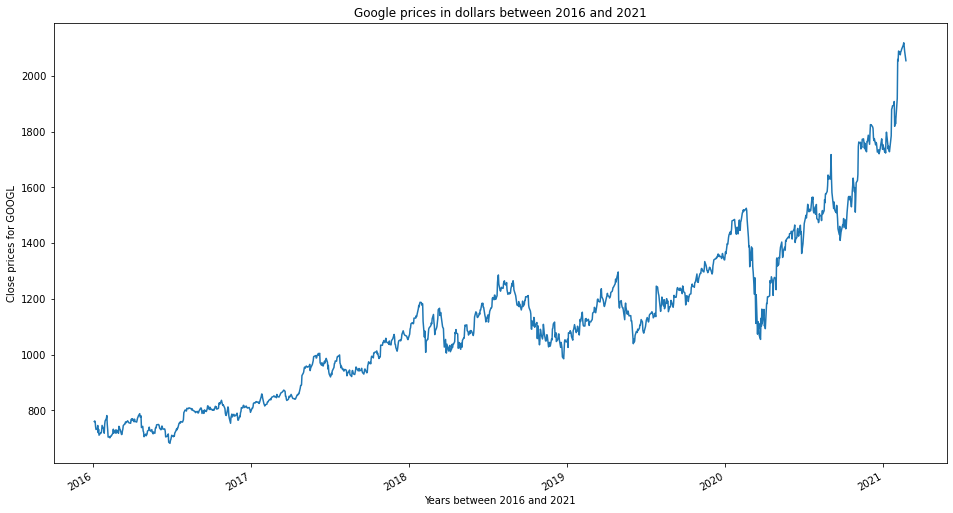

In [12]:
#Plot alphanbet stock since 2016
import matplotlib.pyplot as plt
import seaborn
ax = Alphabet_stock['Adj Close'].plot(figsize=(16, 9), title='Google prices in dollars between 2016 and 2021')
ax.set_xlabel("Years between 2016 and 2021")
ax.set_ylabel("Close prices for GOOGL")

Define a certain window: month, year etc <br>
More like a fourier window: one year, one month? different window sizes. <br>
Inside the window, derive several descriptors to use ML for predicition <br>
Feature engineering <br>
Given maximum price, min price (two descriptors), derive the ratio, average price, standard deviation of the price, <br>
all time high price, time past since price peaked <br>
Skewness of the price. <br>
Plot histogram of the price, say with 10 bins of the fourier transform of the prices. <br>
Check how important the entropy is<br>
Linear regression coefficient of the price and the date <br>
Pearson coefficient between price and date <br>
Take care of delisted companies on the url list of NASDAQ companies

# Price analysis for Alphabet stock

We plot the moving averages for prices for 50, 100, and 200 days. <br>
We plot the average, minimum, and maximum prices for Alphabet stock between 2016 and 2021. <br>
We also derive the highest price per year and all time high price.

<ipython-input-13-f1a498632aa1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alphabet_stock['MA50'] = Alphabet_stock['Close'].rolling(50).mean()
<ipython-input-13-f1a498632aa1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alphabet_stock['MA100'] = Alphabet_stock['Close'].rolling(100).mean()
<ipython-input-13-f1a498632aa1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

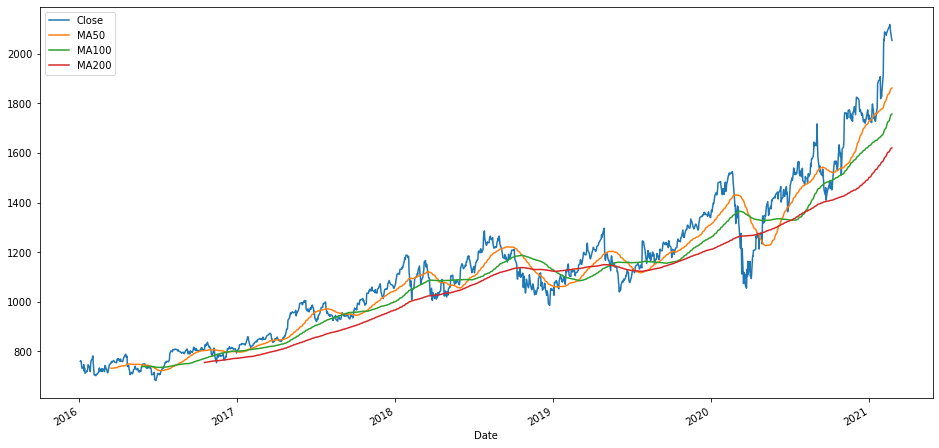

In [13]:
# moving average for 50, 100, and 200 days
Alphabet_stock['MA50'] = Alphabet_stock['Close'].rolling(50).mean()
Alphabet_stock['MA100'] = Alphabet_stock['Close'].rolling(100).mean()
Alphabet_stock['MA200'] = Alphabet_stock['Close'].rolling(200).mean()
Alphabet_stock[['Close', 'MA50', 'MA100', 'MA200']].plot(label = 'DAL', figsize = (16, 8)); 

In [14]:
Alphabet_stock.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
Name          object
MA50         float64
MA100        float64
MA200        float64
dtype: object

In [15]:
# The index column is currently the datetime which we need to analyze the stock.
# We convert the current index column to a normal column
Alphabet_stock.reset_index(inplace=True)

In [16]:
Alphabet_stock

,Date,Open,High,Low,Close,Adj Close,Volume,Name,MA50,MA100,MA200
0,2016-01-04,762.200012,762.200012,747.539978,759.440002,759.440002,3369100.0,GOOGL,NaN,NaN,NaN
1,2016-01-05,764.099976,769.200012,755.650024,761.530029,761.530029,2260800.0,GOOGL,NaN,NaN,NaN
2,2016-01-06,750.369995,765.729980,748.000000,759.330017,759.330017,2410300.0,GOOGL,NaN,NaN,NaN
3,2016-01-07,746.489990,755.309998,735.280029,741.000000,741.000000,3156600.0,GOOGL,NaN,NaN,NaN
4,2016-01-08,747.799988,750.119995,728.919983,730.909973,730.909973,2375300.0,GOOGL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1288,2021-02-16,2091.750000,2145.139893,2091.750000,2110.699951,2110.699951,1548900.0,GOOGL,1840.548591,1730.994094,1605.421599
1289,2021-02-17,2093.979980,2122.439941,2088.350098,2118.620117,2118.620117,1014700.0,GOOGL,1846.484194,1738.086395,1609.428100
1290,2021-02-18,2105.000000,2121.989990,2093.330078,2105.810059,2105.810059,1127300.0,GOOGL,1852.125195,1744.915896,1613.342650
1291,2021-02-19,2107.790039,2118.580078,2083.429932,2088.810059,2088.810059,1866100.0,GOOGL,1857.560796,1751.413396,1617.041600


In [17]:
# convert date from float to datetime type
Alphabet_stock['Date'] =  pd.to_datetime(Alphabet_stock['Date'], format='%d%b%Y:%H:%M:%S.%f')

<ipython-input-17-61b6ad63ba0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alphabet_stock['Date'] =  pd.to_datetime(Alphabet_stock['Date'], format='%d%b%Y:%H:%M:%S.%f')


Text(0.5, 0, 'Stock prices for GOOGL between between 2016 and 2021')

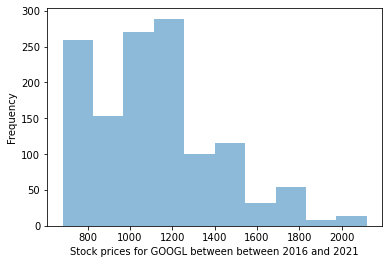

In [18]:
# plot the price of the stock of GOOGL on a histogram with 10 bins
ax = Alphabet_stock['Close'].plot.hist(bins=10, alpha=0.5)
ax.set_xlabel("Stock prices for GOOGL between between 2016 and 2021")

Text(0, 0.5, 'Average Close prices')

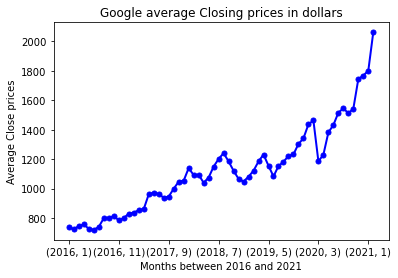

In [19]:
#return the average prices for each month for 'GOOGL'
Alphabet_stock_av = Alphabet_stock['Close'].groupby([Alphabet_stock.Date.dt.year, Alphabet_stock.Date.dt.month]).mean()

ax = Alphabet_stock_av.plot(lw=2, colormap='brg', marker='.', markersize=10, title='Google average Closing prices in dollars')
ax.set_xlabel("Months between 2016 and 2021")
ax.set_ylabel("Average Close prices")

In [20]:
Alphabet_stock_av

Date  Date
2016  1        736.656844
      2        724.389996
      3        746.787270
      4        756.608570
      5        726.529524
                 ...     
2020  10      1541.920898
      11      1743.390002
      12      1767.710904
2021  1       1800.195788
      2       2061.459993
Name: Close, Length: 62, dtype: float64

Text(0, 0.5, 'Minimum Close prices')

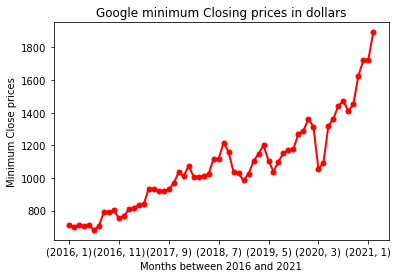

In [21]:
#return the minimum prices for each month for 'GOOGL'
Alphabet_stock_min = Alphabet_stock['Close'].groupby([Alphabet_stock.Date.dt.year, Alphabet_stock.Date.dt.month]).min()

ax = Alphabet_stock_min.plot(lw=2, colormap='flag', marker='.', markersize=10, title='Google minimum Closing prices in dollars')
ax.set_xlabel("Months between 2016 and 2021")
ax.set_ylabel("Minimum Close prices")

Text(0, 0.5, 'Maximum Close prices')

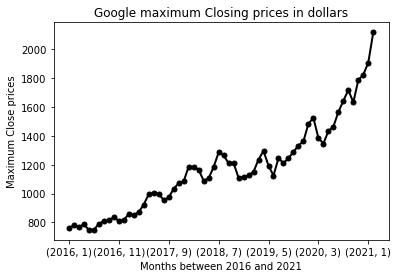

In [22]:
#return the maximum prices for each month for 'GOOGL'
Alphabet_stock_max = Alphabet_stock['Close'].groupby([Alphabet_stock.Date.dt.year, Alphabet_stock.Date.dt.month]).max()

ax = Alphabet_stock_max.plot(lw=2, colormap='nipy_spectral', marker='.', markersize=10, title='Google maximum Closing prices in dollars')
ax.set_xlabel("Months between 2016 and 2021")
ax.set_ylabel("Maximum Close prices")

In [23]:
# highest price by year for 'GOOGL'
Alphabet_stock_year_max = Alphabet_stock['Close'].groupby([Alphabet_stock.Date.dt.year]).max()
Alphabet_stock_year_max

Date
2016     835.739990
2017    1085.089966
2018    1285.500000
2019    1362.469971
2020    1824.969971
2021    2118.620117
Name: Close, dtype: float64

In [24]:
# all-time high price for 'GOOGL'
max(Alphabet_stock_year_max)

2118.6201171875

In [25]:
# highest price by year for 'GOOGL'
Alphabet_stock_year_min = Alphabet_stock['Close'].groupby([Alphabet_stock.Date.dt.year]).min()
Alphabet_stock_year_min

Date
2016     681.140015
2017     807.770020
2018     984.669983
2019    1025.469971
2020    1054.130005
2021    1722.880005
Name: Close, dtype: float64

In [26]:
min(Alphabet_stock_year_min)

681.1400146484375

In [27]:
# time past since price peaked
Alphabet_stock[Alphabet_stock['Close'] == max(Alphabet_stock_year_max)]['Date']

1289   2021-02-17
Name: Date, dtype: datetime64[ns]

# Pearson coefficient between price and date for Alphabet stock

The Pearson correlation coefficient is used to measure the strength of a linear association between two variables, where the value r = 1 means a perfect positive correlation and the value r = -1 means a perfect negataive correlation. <br> https://www.socscistatistics.com/tests/pearson/

In [28]:
stock_final['Adj Close'].corr(stock_final['Close'])

0.9999999999995114

In [29]:
Alphabet_stock['Adj Close'].corr(Alphabet_stock['Close'])

1.0

In [30]:
Alphabet_stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Name',
       'MA50', 'MA100', 'MA200'],
      dtype='object')

In [31]:
Alphabet_stock['Open'].corr(Alphabet_stock['Close'])

0.9986330497517464

In [32]:
Alphabet_stock['Low'].corr(Alphabet_stock['Close'])

0.9993795925842139

In [33]:
Alphabet_stock['High'].corr(Alphabet_stock['Close'])

0.9992979527015735

In [34]:
Alphabet_stock_max.corr(Alphabet_stock_min)

0.9841051455013514

To do: <br>
Explore moving averages <br>
Study fourier windows/window sizes <br>
Leverage Sam to come up with a more structured goal for a project

per six month high, per six month low <br>
take the magnitudes and plot a histogram of the fourier transform <br>
monotonic rate of the stock: how many times the stocks rises in two consecutive days compared to up and down <br>
Does it go up sharply and drop? <br>
Take a window, say one day, compute features where each row is the end of the day and columns are the <br>
features computed from that window. Derive a target variable, in this case the change in the price. The last column is the ground truth, the ground truth is the price P[x+7]/P[x], where x is the date of the END of the window <br>
window1: 1/1/2015 - 2/1/2015
window2: 1/2/2015 - 2/2/2015
window3: 1/3/2015-2/3/2015
Target variable: P[2/7/2015]/P[2/1/2015]